# Facets

In [1]:
import pandas as pd
import altair as alt

In [3]:
import os

In [4]:
os.getcwd()

'/Users/amitkaps/Documents/github/data-vis-workshop/notebooks'

In [5]:
churn = pd.read_csv("../data/churn.csv")

In [6]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

## Facets Examples

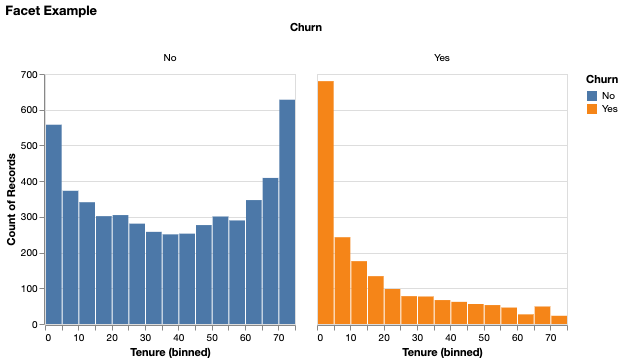

In [10]:
alt.Chart(churn).mark_bar().encode(
    alt.X("Tenure:Q", bin=alt.BinParams(maxbins=20)),
    alt.Y("count()"),
    alt.Column("Churn"),
    alt.Color("Churn")
).properties(
    width=250,
    height=250,
    title="Facet Example"
)

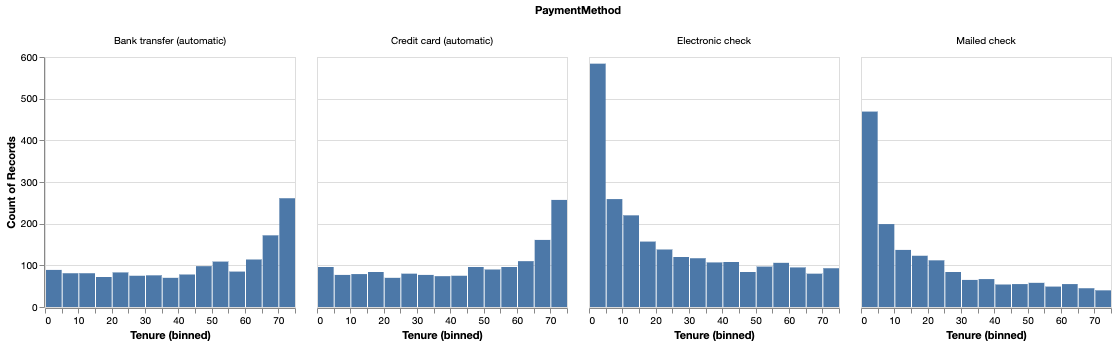

In [11]:
alt.Chart(churn).mark_bar().encode(
    alt.X("Tenure:Q", bin=alt.BinParams(maxbins=20)),
    alt.Y("count()"),
    alt.Column("PaymentMethod"),
).properties(
    width=250,
    height=250
)

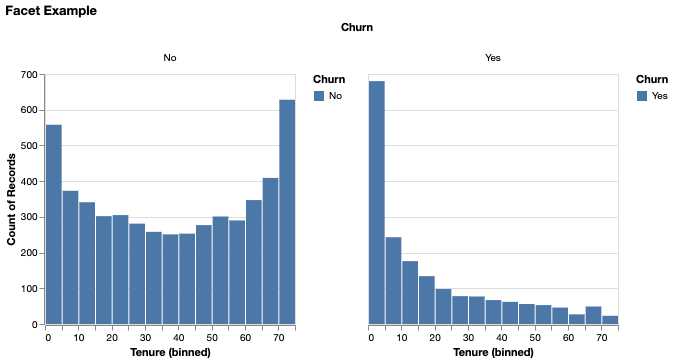

In [15]:
alt.Chart(churn).mark_bar().encode(
    alt.X("Tenure:Q", bin=alt.BinParams(maxbins=20)),
    alt.Y("count()"),
    alt.Column("Churn"),
    alt.Color("Churn")
).properties(
    width=250,
    height=250,
    title="Facet Example"
).resolve_scale(color="independent")

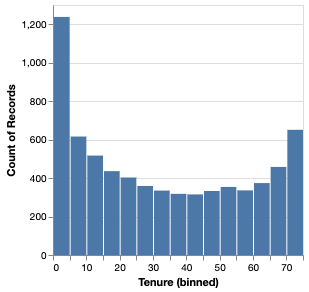

In [19]:
base = alt.Chart(churn).mark_bar().encode(
    alt.X("Tenure:Q", bin=alt.BinParams(maxbins=20)),
    alt.Y("count()")
).properties(
    width=250,
    height=250
)
base

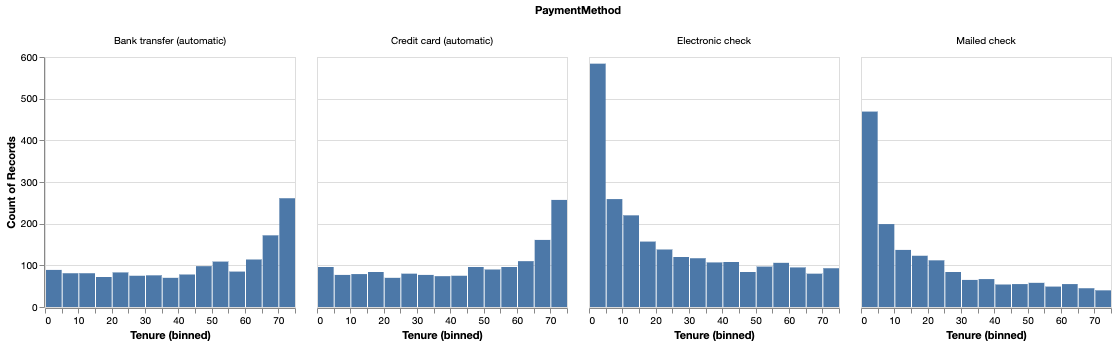

In [18]:
base.facet(
    column="PaymentMethod"
)

In [23]:
churn['TotalCharges'] = pd.to_numeric(churn.TotalCharges.str.replace(" ",""))

### Repeat

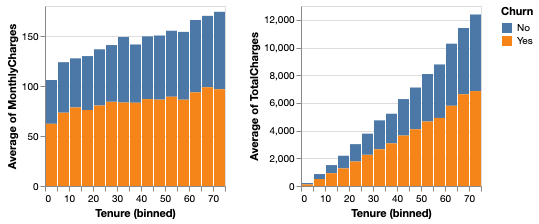

In [24]:
alt.Chart(churn).mark_bar().encode(
    alt.X("Tenure:Q", bin=alt.BinParams(maxbins=20)),
    alt.Y(alt.repeat("column"), aggregate='average',type="quantitative"),
    color="Churn"
).properties(
    width=180,
    height=180
).repeat(
    column=["MonthlyCharges", "TotalCharges"]
)

### Layers

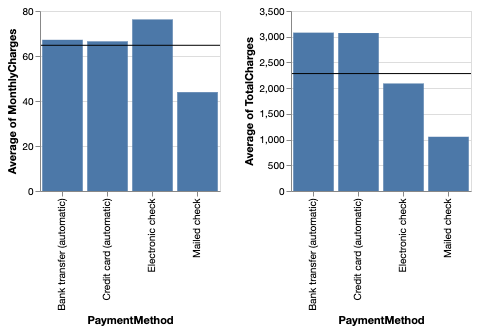

In [25]:
alt.layer(
    alt.Chart(churn).mark_bar().encode(
        alt.X("PaymentMethod"),
        alt.Y(alt.repeat('column'), aggregate="average", type="quantitative")
    ),
    alt.Chart(churn).mark_rule(color="black").encode(
        alt.Y(alt.repeat('column'), aggregate="average", type="quantitative")
    )
).properties(
    width=180,
    height=180
).repeat(
    column = ['MonthlyCharges', "TotalCharges"]
)